In [74]:
import numpy as np
import matplotlib.pyplot as plt

### Octave code to simulate linear Kalman filter for simple example
This code simulates the example introduced in lesson 3.3.3 and is a straightforward implementation of the six Kalman-filter steps on a simple model. You will use this code to answer the practice-quiz questions for this lesson. Feel free to add your own statements to plot or output variables computed by the filter to help you understand better how it works.

In [4]:
sigma_w = 1 # process noise covariance
sigma_v = 1 # process noise covariance
A = 1
B = 1 
C = 1
D = 0  # plant definition matrices
max_iter = 40

In [41]:
sigma_w = np.array(sigma_w)
sigma_v = np.array(sigma_v)
A = np.array(A)
B = np.array(B)
C = np.array(C)
D = np.array(D)

In [27]:
# Initialize true state, state estimate, error covariance, initial input

xtrue = np.array((0))  # Initialize true system initial state
xhat = 0   # Initialize Kalman filter initial estimate
sigma_x = 0 # Initialize Kalman filter covariance
u = 0      # Unknown initial driving input: assume zero

In [42]:
xstore = np.zeros((max_iter+1,1))
xstore[:,0] = 0

xhatstore = np.zeros((max_iter,1))
sigma_xstore = np.zeros((max_iter,1**2))

In [70]:
test = np.arange(0,40,1.)

for k in range(max_iter):
    
    # KF Step 1: State estimate time update
    xhat = A*xhat + B*u # use prior value of u
    
    # KF Step 2: Error covariance time update
    sigma_x = A*sigma_x*A.T + sigma_w 
    
    # Implied operation of system in background, with input signal u, output signal z
    u = 0.5*np.random.randn(1) + np.cos(k/np.pi)

[1.34564107]
[0.41143775]
[0.19233287]
[1.54881553]
[0.26598793]
[-0.39227752]
[-0.12028556]
[0.08978103]
[-0.28670862]
[-0.24379546]
[-1.13062852]
[-0.95048454]
[-0.49610867]
[-0.86838292]
[-0.20355614]
[-0.50908579]
[1.50937948]
[1.05031024]
[0.19816959]
[1.57913614]
[0.47534001]
[1.19210118]
[0.62730028]
[0.64880848]
[0.04573939]
[0.30520536]
[-0.58100562]
[-1.36838794]
[-0.39962402]
[-0.53782834]
[-0.84405844]
[-1.55433349]
[-0.27648706]
[-0.19635497]
[0.22867933]
[0.45785984]
[1.518353]
[0.44071031]
[1.02332099]
[1.37230231]


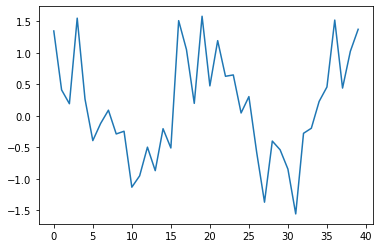

In [75]:
plt.plot(test)